# VisClaw.jl - examples of use
   
<div style="text-align: right;"> Dec. 2019 </div>
<div style="text-align: right;"> VisClaw.jl v0.3.4 </div>
<div style="text-align: right;"> Plots.jl v0.28.1 </div>
<div style="text-align: right;"> GR.jl v0.44.0 </div>
<div style="text-align: right;"> Clawpack v5.6.1 </div>
<div style="text-align: right;"> Takuya Miyashita (miyashita@hydrocoast.jp) </div>
   
## Load conditions and numerical results 
VisClaw.jl refers to a directory `_output` and read files in this directory such as `fort.q0000` and `claw.data`. 
Keep the directory as is after the simulation.  

Topography and bathymetry can be loaded using `VisClaw.LoadTopo()` through `topo.data`

In [1]:
using VisClaw

# chile2010 _output
simdir = joinpath(CLAW,"geoclaw/examples/tsunami/chile2010/_output")

# load etopo from topo.data
topo = VisClaw.LoadTopo(simdir)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


In [2]:
# load dtopo from dtopo.data
dtopo = VisClaw.LoadDeform(simdir)

# check
println(typeof(dtopo))
println(fieldnames(typeof(dtopo)))

VisClaw.DTopo
(:mx, :my, :x, :y, :dx, :dy, :mt, :t0, :dt, :deform)


A method `VisClaw.LoadSurface()` is useful to load the sea surface heights in `fort.qXXX` in the form of Adaptive Mesh Refinement (AMR).

In [3]:
# load surface (fort.q0000 to fort.q0018)
amrall = VisClaw.LoadSurface(simdir)

# check
println(typeof(amrall))
println(fieldnames(typeof(amrall)))
amrall.nstep, amrall.timelap

VisClaw.AMR
(:nstep, :timelap, :amr)


(19, [0.0, 1800.0, 3600.0, 5400.0, 7200.0, 9000.0, 10800.0, 12600.0, 14400.0, 16200.0, 18000.0, 19800.0, 21600.0, 23400.0, 25200.0, 27000.0, 28800.0, 30600.0, 32400.0])

## Plot data
Methods which names begin with a word `Plots` can plot data using `Plots.jl`.
For example, `VisClaw.PlotsTopo(topo::VisClaw.Topo)` illustrates the topography and bathymetry data.
The keyword arguments are the same as `Plots.plot()`.

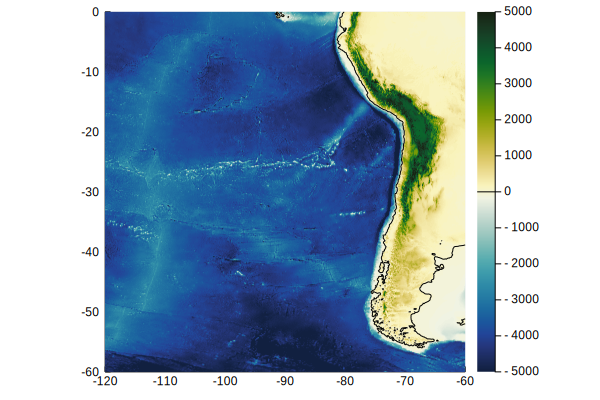

In [4]:
plt = VisClaw.PlotsTopo(topo; linetype=:heatmap, color=:delta, clims=(-5000,5000))
plt = VisClaw.PlotsTopo!(plt, topo; linetype=:contour, fill=false, lc=:black, levels=[0])

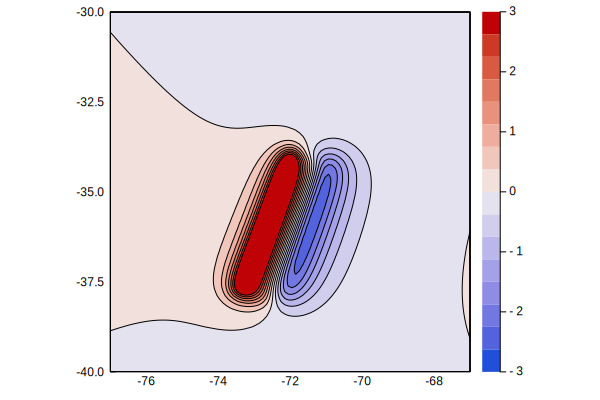

In [5]:
plt = VisClaw.PlotsTopo(dtopo; linetype=:contourf, color=:coolwarm, clims=(-3.0,3.0))

The return value is a type of `Plots.Plot`, which can be saved as a file with `Plots.savefig()`

In [6]:
using Plots
savefig(plt, "dtopo.svg")

Similarly, the spatial distribution of the sea surface height can be plotted with `VisClaw.PlotsAMR()`

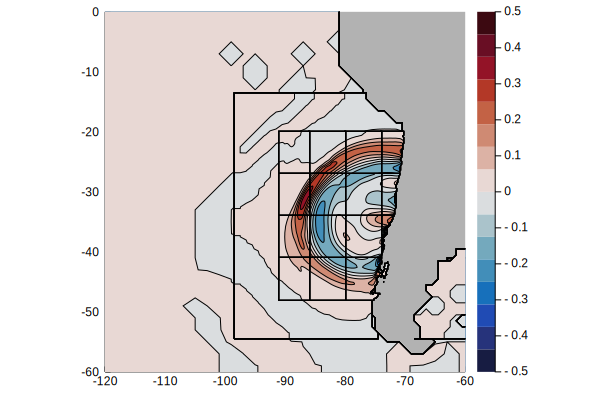

In [7]:
# plot
plts = VisClaw.PlotsAMR(amrall; c=:balance, clims=(-0.5,0.5))
plot(plts[5])

When you want to see the grid numbers in AMR, overwrite these plots with `VisClaw.GridNumber!()` 

┌ Info: Saved animation to 
│   fn = /home/miyashita/chile2010_eta.gif
└ @ Plots /home/miyashita/.julia/packages/Plots/AXUqs/src/animation.jl:98


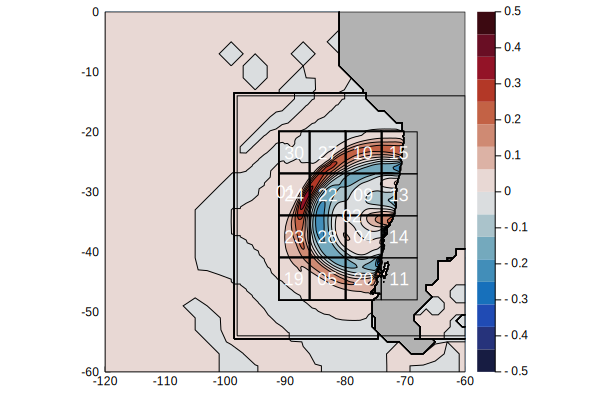

In [8]:
# overlay the grid numbers
plts = VisClaw.GridNumber!.(plts, amrall.amr; font=Plots.font(12, :white, :center))
plts = VisClaw.DrawBound!.(plts, amrall.amr)

# make an animation
anim = Plots.Animation()
map(p->Plots.frame(anim, p), plts)
Plots.gif(anim, "~/chile2010_eta.gif"; fps=3)

# show
plot(plts[5])